# "Star Trek - The Next Generation" - Predicting Who Says What



My first motivation to work with the **Star Trek Next Generation** transcripts from [chakoteya.net](http://www.chakoteya.net/NextGen/) was, to try out some machine learning algorithms. I came up with the idea to predict which STNG character is the speaker of a text-line or word.

Therefore I had to download and clean the data, which was a good practice in **startrekng-episodes-analysis_01.ipynb**.

It also was a good practice in analyzing a dataset with python, numpy and pandas in **startrekng-episodes-analysis_02.ipynb**.

Finally we arrived here in **startrekng-episodes-analysis_03.ipynb**, where I concentrate on predicting the speakers via **``Multinomial Naive Bayes``**.



## Multinomial Naive Bayes 
In wikipedia the formulas looks veeeery complicated, but it's basics are pretty easy: 

You start with a set of documents - or in this case: text-lines, where you know who is the speaker of every line.
1. You then calculate the ratio how often a speaker says a word over all words he says. 
2. Further you need the ratio of how often a speaker talks at all over all other speakers. 
3. Now you get a new line, where you do not know, who the speaker is. 
4. You do some multiplication with every *speakers ratio* and his *word ratios* in this line and the speaker with the highest value wins!

Examples: 
* Have a look at chapter "Some More Details" below 
* Or have a look at this [coursera video](https://class.coursera.org/nlp/lecture/28) which helped me a lot in the first place.

But let's have some quick first results! For that, we use the python sklearn API, which provides many helpful functions. 

Afterwards we have some explanation, and then we will measure, how good our predictions are and will have a look at how we could improve them.

[*And thanks again to Chrissy from chakotey.net for writing the transcripts at all!*]

In [1]:
# import the prepared DataFrame
import pandas as pd
cLinesDf = pd.read_pickle("cLinesDf_01_aftercleaning")

In [2]:
cLinesDf.head()

,epsIdx,line,epsName,epsLineIdx,OC,on monitor,telepath
character,,,,,,,
PICARD,1,"You will agree, Data, that Starfleet's orders...",Encounter at Farpoint,3,False,False,False
DATA,1,Difficult? Simply solve the mystery of Farpoi...,Encounter at Farpoint,4,False,False,False
PICARD,1,As simple as that.,Encounter at Farpoint,5,False,False,False
TROI,1,Farpoint Station. Even the name sounds myster...,Encounter at Farpoint,6,False,False,False
PICARD,1,"It's hardly simple, Data, to negotiate a frie...",Encounter at Farpoint,7,False,False,False



# Quick Results

In [3]:
# if you do not have it yet - download the stopwords package
#import nltk
#nltk.download()


In [4]:
# get the lines of the speakers we want to predict

import numpy as np

# we only predict the lines of the main crew
analyze = np.array(["PICARD", "RIKER", "DATA", "LAFORGE", "TROI", "WORF", "CRUSHER", "WESLEY"])
cLinesDf2 = cLinesDf.loc[analyze].copy()

# we need an index-value for every character (PICARD=0, RIKER=1, DATA=2, ...)
cLinesDf2["characterIdx"] = [np.argwhere(analyze == x)[0][0] for x in cLinesDf2.index.values]


In [43]:
# convert the words in to numbers

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# we use the TfidVectorizer to convert the text in to numbers (explained later)
# every line will be displayed as a array of numbers. Every position in these arrays determines a specific word.


# now we vectorize with some parameters (they do not have a high impact in this example, as far as I can tell...)
tfidfparameters = {
    'min_df': 3,               # every word occures at least three times in all the documents
    'encoding': 'utf-8',       
    'decode_error': 'ignore',
    'ngram_range': [1,2]       
}
vectorizerAll = TfidfVectorizer(stop_words=stopwords.words('english'), **tfidfparameters)


# **********************************************
# vectorize all the lines
X_lines = vectorizerAll.fit_transform(cLinesDf2["line"])


In [6]:
# calculate the probabilities

# now we use the vector to get the probabilities of who said what (explained later)
#  this is amazingly fast in comparison to the vectorization...
from sklearn.naive_bayes import MultinomialNB


# **********************************************
# train the algorithm
multNBAll = MultinomialNB(alpha = 0.01).fit(   X_lines,                                 # fit this  
                                            cLinesDf2["characterIdx"].tolist())      # to this


## Let's Predict Some Things

Ready to go!

See some results of text and what the algorithm predicts. 

the darker, the more probable:


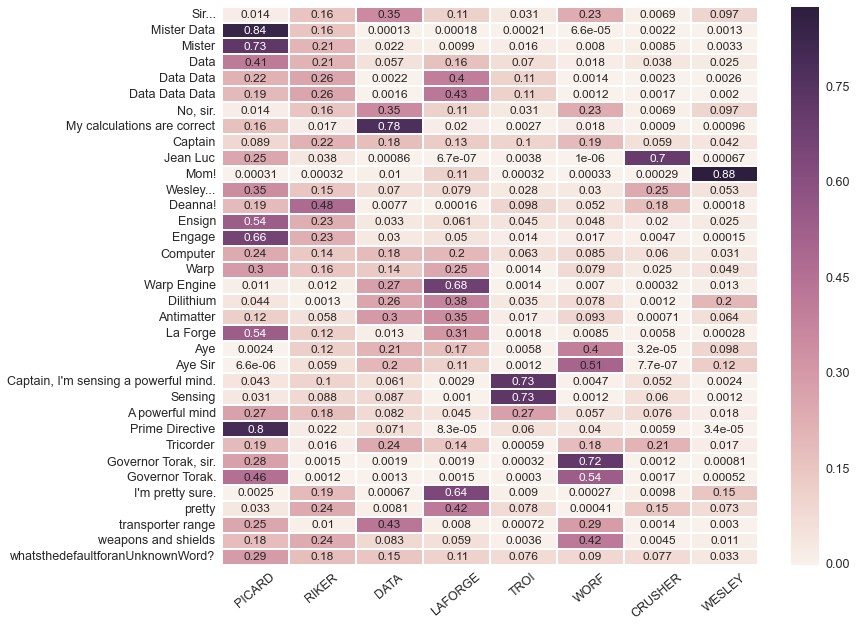

,PICARD,RIKER,DATA,LAFORGE,TROI,WORF,CRUSHER,WESLEY,character
Sir...,0.0143,0.1550,0.3530,0.1099,0.0307,0.2334,0.0069,0.0969,DATA
Mister Data,0.8397,0.1562,0.0001,0.0002,0.0002,0.0001,0.0022,0.0013,PICARD
Mister,0.7261,0.2065,0.0220,0.0099,0.0156,0.0080,0.0085,0.0033,PICARD
Data,0.4137,0.2129,0.0567,0.1650,0.0703,0.0182,0.0385,0.0247,PICARD
Data Data,0.2186,0.2612,0.0022,0.4031,0.1084,0.0014,0.0023,0.0026,LAFORGE
Data Data Data,0.1940,0.2592,0.0016,0.4276,0.1127,0.0012,0.0017,0.0020,LAFORGE
"No, sir.",0.0143,0.1550,0.3530,0.1099,0.0307,0.2334,0.0069,0.0969,DATA
My calculations are correct,0.1648,0.0172,0.7755,0.0201,0.0027,0.0179,0.0009,0.0010,DATA
Captain,0.0894,0.2158,0.1767,0.1286,0.1019,0.1867,0.0592,0.0417,RIKER
Jean Luc,0.2541,0.0380,0.0009,0.0000,0.0038,0.0000,0.7025,0.0007,CRUSHER


In [7]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt



lines =["Sir...",
        "Mister Data",
        "Mister",
        "Data",
        "Data Data",
        "Data Data Data",
        "No, sir.",
        "My calculations are correct",
        "Captain",
        "Jean Luc",
        "Mom!",
        "Wesley...",
        "Deanna!", 
        "Ensign",
        "Engage",
        "Computer",
        "Warp",
        "Warp Engine",
        "Dilithium",       
        "Antimatter",
        "La Forge",
        "Aye",
        "Aye Sir",
        "Captain, I'm sensing a powerful mind.",
        "Sensing",
        "A powerful mind",
        "Prime Directive",
        "Tricorder",
        "Governor Torak, sir.",
        "Governor Torak.",
        "I'm pretty sure.",
        "pretty",
        "transporter range",
        "weapons and shields",
        "whatsthedefaultforanUnknownWord?"
       ]


# **********************************************
# the whole predicting stuff:


vectors = vectorizerAll.transform(lines)                 # also vectorize the lines to predict
df = pd.DataFrame(
            index   = lines,                             # the lines as index of the DataFrame
            columns = analyze,                           # the speaking characters as columns
            data    = multNBAll.predict_proba(vectors))  # fill the character columns with the probabilities per character and line

df["character"] = analyze[ multNBAll.predict(vectors)]   # add a column with the character who has the highest predicted probability



# **********************************************
# just plotting and printing
print "the darker, the more probable:"
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.25)
g = sns.heatmap(df[[0,1,2,3,4,5,6,7]],               # choose the character columns only
                annot=True,  annot_kws={"size": 12}, # add cell anotations
                linewidths=1                         # space between the cells   
               )                        

plt.setp(g.get_xticklabels(), rotation=40)
plt.setp(g.get_yticklabels(), rotation=0)
plt.show()


# print out the DataFrame
pd.options.display.float_format = '{:,.4f}'.format
df

## Intuitive Results

For most of the words I would really have guessed the same predicted result! 

It comes not as a suprise, that words like *"dilithium"* and *"antimatter"* are very probable spoken by chief engineer Geordi La Forge.

On the other hand, for *"I'm pretty sure"*, Geordi would not have been my first guess - at least not with 64% probability!

"Governor Torak" is interessting, because Picard said these words two times and Worf only once! But as Worf does not talk as much as Picard, it is more likely, that he utters these words, because they are more significant for him in comparisson to how seldom he speaks.

In [8]:
cLinesDf2[cLinesDf2["line"].str.contains("Governor Torak")]


,epsIdx,line,epsName,epsLineIdx,OC,on monitor,telepath,characterIdx
character,,,,,,,,
PICARD,138,"Governor Torak, I apologise. I can see that y...",Aquiel,63,False,False,False,0
PICARD,138,The Klingon ship Qu'Vat has arrived with Gove...,Aquiel,91,False,False,False,0
WORF,138,"Governor Torak, sir.",Aquiel,93,False,False,False,5


Le'ts print out the terms of every character in the order he uses them most probable:

In [99]:
# most usesd words by character
import operator
vocabularyAll = pd.DataFrame(sorted(vectorizerAll.vocabulary_.items(), reverse=False, key=operator.itemgetter(1)),columns=["term","idx"])
vocabularyAll.set_index("idx", inplace=True)

mostUsedWords = pd.DataFrame(index=range(len(vocabularyAll)))
for i in range(8):    
    idxOfMainWords = multNBAll.feature_log_prob_[i].argsort()[::-1] # order of term-indicies from most to less probable
    mostUsedWords[analyze[i] + "'s most terms:"] = vocabularyAll.ix[idxOfMainWords].values # the indicies fit to the vocabulary!
mostUsedWords[:51]

,PICARD's most terms:,RIKER's most terms:,DATA's most terms:,LAFORGE's most terms:,TROI's most terms:,WORF's most terms:,CRUSHER's most terms:,WESLEY's most terms:
0,mister,sir,sir,sir,mother,sir,re,sir
1,data,captain,captain,data,captain,aye,right,yes
2,one,re,yes,captain,yes,captain,yes,aye
3,yes,data,would,re,know,aye sir,ve,mom
4,number,ll,aye sir,right,re,yes,know,aye sir
5,number one,riker,aye,yeah,like,commander,captain,yes sir
6,doctor,know,doctor,ve,data,klingon,think,captain
7,come,yes,believe,aye,think,shields,ll,know
8,mister data,ve,commander,aye sir,right,open,like,re
9,re,worf,yes sir,know,something,would,going,think


If you know the series, the most usesd words definitely fit the characters :-)

# Some More Details

## What happend in the "Quick Results"? 


### 1. Words have been vectorized as numbers

This is a necessary step for further computing the probabilities.

For example, if we only have the 4 words "Shields", "hold", "raise", "are" 
* and if a line reads "Shields are holding!", it would have the vector: [1,1,0,1]  (in the sequence of the words above) 
* and if a line reads "Shields! Raise shields!", it would have the vector: [2,0,1,0]  

But we did not only count the words. We used the TfidfVectorizer. 

Tfidf stands for *"Term Frequency - Inverse Document Frequency"*. That means, it does not use the word frequency alone, but connects every word frequency with its frequency in all documents (=spoken lines). For example very common words like "You" or "We" occures very often in every spoken line, but as it occures in almost every line, its importance is very low. That's why the vectors do not contain integers but weighted float values. Have a look in "*Appendix A*" below, for some more explanation.



### 2. The Word-Vectors Are Used To Predict The Speakers

We use the [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) to calculate the probabilities of who said what. 

For that, we also need numbers for the speakers, like PICARD=0 and WORF=5
* If "Shields are holding!" is said by WORF, MultinomialNB would get the information [1,1,0,1] -> 5
* If "Shields! Raise shields!" is said by PICARD, MultinomialNB would get the information [2,0,1,0] -> 0

In this simple example, it would be more probable for Picard to say the words "Shield" and "raise". Worf also would have some probability to say "Shield", but "raise" would be almost 0.0 probable. 

Why not 0.0? It is a common practice to (almost) never ever give anything a 0.0 probability, because it rules out everything else. For example, if a sentence like "I raise the shields and they will hold, hold, hold, hold!" is uttered, it would never be predicted to be from Worf, even if that many "hold"'s are very probable spoken by Worf. 


### 3. We Predict The Speakers Of Some New Lines

We can feed the MultinomialNB any text we want. If it does not know a word like "whatsthedefaultforanUnknownWord", it uses the "Prior", which is the basic distribution of the speakers. For example Picard speaks 29% of all 12286 lines (3556) and so on.

If we know how often a character speaks a specific word and how often he speaks at all, we can calculate the probability that he speaks all the words in the line. 

A simplified example: the line is "hold, hold, hold":

* Lieutenant Worf speaks 30% of all lines, and the word "hold" is 12% of his words. Therefore, the probability of Worf to speak "hold, hold, hold" would be: ``0.3 * (0.12 * 0.12 * 0.12) = 0.0005184`` - normalized by 0.0005184/(0.0005184 + 0.0004000) = 0.564 
* LtCdr Data speaks 40% of all lines, and the word "hold" is 10% of his words. Therefore, the probability of Data to speak "hold, hold, hold" would be: ``0.4 * (0.10 * 0.10 * 0.10) = 0.0004000`` - normalized by 0.0004000/(0.0005184 + 0.0004000) = 0.435 

That means, even if Data speaks 40% of all lines, the line "hold, hold, hold" is much more probable uttered by Worf.


## Trainingset und Testset

We can predict the speakers now and the predictions feel ok. But how good are the predictions? We need some test-environment!

Therefore we divide our data in a training-set and a test-set, so that we can compare the predictions on the test-set with the real values. We take 2/3 of the data to train our predictions and with the last 1/3 we test it.

In [12]:
import numpy as np


# we set the random seed, to get the same "random" results every time 
# that makes the results reproducable. 
#  (but if we leave the seed out, the results are not really different every time we start again.)
np.random.seed(2016)


# here we create the test-set manually instead of using helpful sklearn functions
def createTestTrainSets(df, siz):
    allidx = set(range(0,len(df)))

    trainIdxs = set(np.random.choice(len(df),siz,replace=False))
    testIdx = allidx - trainIdxs

    # id set for test and train data
    trainDf = df.ix[trainIdxs]
    testDf  = df.ix[testIdx]
    
    assert len(df) == len( set( trainIdxs | testIdx ) ), "union of test and train set's should be the same as the df-size"
    
    return trainDf, testDf



trainDf, testDf = createTestTrainSets(cLinesDf2, 30000)

# check the length of the sets
len(cLinesDf2),len(trainDf), len(testDf), len(trainDf) + len(testDf)


(42286, 30000, 12286, 42286)

In [13]:
trainDf.head(10)

,epsIdx,line,epsName,epsLineIdx,OC,on monitor,telepath,characterIdx
character,,,,,,,,
PICARD,1,"You will agree, Data, that Starfleet's orders...",Encounter at Farpoint,3,False,False,False,0
PICARD,1,As simple as that.,Encounter at Farpoint,5,False,False,False,0
PICARD,1,"Data, how can you be programmed as a virtual ...",Encounter at Farpoint,9,False,False,False,0
PICARD,1,"Exactly, yes.",Encounter at Farpoint,13,False,False,False,0
PICARD,1,Shut off that damned noise. Go to Yellow Alert.,Encounter at Farpoint,19,False,False,False,0
PICARD,1,"Reverse power, full stop.",Encounter at Farpoint,21,False,False,False,0
PICARD,1,"Data, call medics.",Encounter at Farpoint,27,False,False,False,0
PICARD,1,He would not have injured you. Do you recogni...,Encounter at Farpoint,29,False,False,False,0
PICARD,1,What? That nonsense is centuries behind us.,Encounter at Farpoint,33,False,False,False,0


In [14]:
testDf.sort(["epsIdx", "epsLineIdx"]).head(10)

,epsIdx,line,epsName,epsLineIdx,OC,on monitor,telepath,characterIdx
character,,,,,,,,
TROI,1,Farpoint Station. Even the name sounds myster...,Encounter at Farpoint,6,False,False,False,4
PICARD,1,"It's hardly simple, Data, to negotiate a frie...",Encounter at Farpoint,7,False,False,False,0
PICARD,1,"It means to spy, to sneak.",Encounter at Farpoint,11,False,False,False,0
WORF,1,"Shields and deflectors up, sir.",Encounter at Farpoint,20,False,False,False,5
PICARD,1,That's quite a directive. Would you mind iden...,Encounter at Farpoint,24,False,False,False,0
PICARD,1,No. The same old story is the one we're meeti...,Encounter at Farpoint,46,False,False,False,0
PICARD,1,"Sense anything, Commander?",Encounter at Farpoint,52,False,False,False,0
PICARD,1,Search theoretical.,Encounter at Farpoint,58,False,False,False,0
DATA,1,"It is possible, sir. But absolutely no margin...",Encounter at Farpoint,59,False,False,False,2


In [15]:
# let's start again

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), **tfidfparameters)

# we fit transform the words in column "line" to a vector
X_train = vectorizer.fit_transform(trainDf["line"])


In [16]:
X_train

<30000x11921 sparse matrix of type '<type 'numpy.float64'>'
	with 198066 stored elements in Compressed Sparse Row format>

The X_train matrix has 30000 rows (=lines) and 11921 columns (=different words)

In [17]:
X_lines 

<42286x16356 sparse matrix of type '<type 'numpy.float64'>'
	with 290505 stored elements in Compressed Sparse Row format>

The whole data set in X_lines had almost 5000 more words( 11921 vs 16356), which are mostly only known to the test-set. 

In [18]:
# but we can not just substract - because for example u'detecting temporal' will not occure in a "vectorizerTestOnly",
# because it occures only twice in the DataFrame. We would have to adjust the 'min_df': 1 for every vectorizer first...
testDf[testDf["line"].str.contains("detecting .* temporal")]

,epsIdx,line,epsName,epsLineIdx,OC,on monitor,telepath,characterIdx
character,,,,,,,,
DATA,126,"Sir, I am detecting a temporal distortion on ...",Time's Arrow part two,345,False,False,False,2
DATA,150,"Captain, I am detecting a temporal disturbanc...",Timescape,94,False,False,False,2


# Predicting the Speakers of Lines

In [19]:
from sklearn.naive_bayes import MultinomialNB

multNB = MultinomialNB(alpha=0.01).fit(X_train, trainDf["characterIdx"].tolist())


Now we are ready to predict some speaker of lines in the test-set. For example for this entry "WORF" should be predicted


In [20]:
testDf.iloc[1010]

epsIdx                                       49
line             Yes, sir. Coming through, sir.
epsName                  The Ensigns of Command
epsLineIdx                                  319
OC                                        False
on monitor                                False
telepath                                  False
characterIdx                                  5
Name: WORF, dtype: object

In [21]:
lines = testDf.iloc[1010]["line"]         # take one line
vectorize = vectorizer.transform([lines]) # transform to vectors
predIdx = multNB.predict(vectorize)       # predict a vector
predC = analyze[predIdx]                  # what character name is the prediction?

predC

array(['WORF'], 
      dtype='|S7')

That worked out well, but how do we know, how good the predictions work over all?
Luckily, sklearn comes with some nice metric functions.

In [22]:
# let's transform the whole test-set!

lines = testDf["line"]                    # take one line
X_test = vectorizer.transform( lines ) # transform to vectors
predIdx = multNB.predict(X_test)       # predict a vector
predC = analyze[predIdx]                  # what character name is the prediction?



In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# now we can use classification_report to see how good the predictions work
print classification_report(testDf["characterIdx"].tolist(), 
                            predIdx,
                            target_names=analyze)

             precision    recall  f1-score   support

     PICARD       0.44      0.72      0.55      3556
      RIKER       0.32      0.26      0.29      2199
       DATA       0.46      0.49      0.47      1798
    LAFORGE       0.44      0.32      0.37      1352
       TROI       0.30      0.18      0.23       928
       WORF       0.41      0.28      0.33      1096
    CRUSHER       0.42      0.21      0.28       953
     WESLEY       0.31      0.08      0.12       404

avg / total       0.40      0.42      0.39     12286



## What do we see? 

The **precision column** tells us, how often the selected are relevant. That means, if the prediction choosed "PICARD" it was right in 44% of the cases. That means, "PICARD" was choosen in 56% of the cases, when Picard was NOT the speaker.

The **recall column** tells us, how often the relevant are selected. That means, that 73% of Picards lines have been assigned with "PICARD" if it was right, but in 27% of the cases "PICARD" has not been assigned.

(You find some more details to precision and recall at the end of this notebook)

These predictions are not very good, but still, they are a lot better than random:


In [24]:
randomPrediction = np.random.randint(7,size=12286)
print classification_report(  testDf["characterIdx"].tolist()
                            , randomPrediction)

             precision    recall  f1-score   support

          0       0.29      0.14      0.19      3556
          1       0.18      0.15      0.16      2199
          2       0.14      0.13      0.14      1798
          3       0.13      0.16      0.14      1352
          4       0.08      0.14      0.10       928
          5       0.10      0.16      0.12      1096
          6       0.08      0.15      0.11       953
          7       0.00      0.00      0.00       404

avg / total       0.17      0.14      0.15     12286



C:\Users\cruce\Anaconda\lib\site-packages\sklearn\metrics\classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In the random prediction Picard is still a lot better, because he has the biggest share of lines. He holds actually pretty much 29% of all lines in our testDf DataFrame. You can see that in the random prediction... 

This value is also the prior belief, if you predict the speaker of a word, which is not known to the train-set:

In [25]:
vectorize = vectorizer.transform( ["thiswordhasneverbeenspokenbyaaaanyone"] ) # transform to vectors
multNB.predict_proba(vectorize)

array([[ 0.2924    ,  0.17353333,  0.1502    ,  0.10756667,  0.0762    ,
         0.09086667,  0.07616667,  0.03306667]])

But still: If the MultinomialNB-predictions tells us, that Picard has spoken a line, it is right only in 44% of the cases. 

More than half the predictions will be wrong!

In the train-set we do a lot better, but that's of no wonder and you never should take the train-set-predictions into account. 

But as we do not even reach 90% in the trains-set, I guess the vocabulary of the lines is just not descriptive enough for the speaking characters - all characters share a lot of the same vocabulary. 

In [26]:
# with the train-set we are a lot better
predTrain = multNB.predict(X_train)

print classification_report(trainDf["characterIdx"].tolist(), 
                            predTrain,
                            target_names=analyze)

             precision    recall  f1-score   support

     PICARD       0.59      0.88      0.71      8772
      RIKER       0.69      0.56      0.62      5206
       DATA       0.72      0.72      0.72      4506
    LAFORGE       0.77      0.61      0.68      3227
       TROI       0.72      0.54      0.62      2286
       WORF       0.70      0.55      0.62      2726
    CRUSHER       0.83      0.55      0.66      2285
     WESLEY       0.87      0.44      0.58       992

avg / total       0.70      0.67      0.67     30000



# How to Improve The Predictions?

How can we improve it? Can we achive better results, if we take other features into account? 

## "Implicit" Features
Let's do some brainstorming: MultinomialNB works with some assumptions, which may worsen a possible better result. For example the length of a sentence or a word is not taken into account. More importantly the order of words do not play a role in MultinomialNB. It might improve the result to check if a "Sir" stands at the beginning or the end of a sentence. If that is the case, it might indicate that it's not Picard who is talking. These are features of the given text, we could take directly into account.

## "Explicit" Features
There are also other information, which is not given by the text-lines directly. For example the MultinomialNB-predictions don't have any information in which episodes a character appears. If we know the episode and we know that LaForge did not appear in it, we know that he could not have said *"I'm pretty sure"* (or any other line...)

So there are some possible improvements, which I might try in a upcoming notebook. 


## The Impact of the Text-Length On The Predictions

At first, let's just check, whether the length of a line has any impact at all. (And that will be it for this notebook. :-)



In [27]:
import random
from sklearn.metrics import  f1_score
from sklearn.metrics import precision_recall_fscore_support

np.random.seed(2016)


f1Scores = []
xticks   = []
widths   = []

istart = 0
istartNext = 0

samplesize = 5000.0
stepsize = 10
windowsize = 1000

# we split the test-set in small overlapping samplesize pieces, where the lines are every stepsize a windowsize long.
while istart < 800:
    f1scr = 0.0
        
    istart = istartNext
    istartNext = istart + stepsize 

    
    # get the right indicies
    idxLength = np.where((testDf["line"].str.len() > istart) )[0]
    X_testLong = X_test[idxLength]

    
    # predict
    pred = multNB.predict(X_testLong)
    cm = confusion_matrix(testDf.iloc[idxLength]["characterIdx"], pred)

    
    # calculate f1-score
    p, r, f1, s = precision_recall_fscore_support(testDf.iloc[idxLength]["characterIdx"],pred,
                                                      #labels=analyze,
                                                      average=None,
                                                      sample_weight=None)
    f1scr = np.average(f1, weights=s)
    # for some reason average="sample" does not work, so I calculated it on my own: 
    #f1scr = f1_score(testDfLong["characterIdx"].tolist(),pred, average="sample")
    # in the source https://github.com/scikit-learn/scikit-learn/blob/c957249/sklearn/metrics/classification.py#L996
    #   it looks like sklearn.utils.multiclass.type_of_target() of the idx and pred 
    #   should be 'multilabel' instead of 'multiclass', but why? maybe a reader has an answer for me...
 

    # for plotting:
    f1Scores.append(f1scr)
    xticks.append(" > %4i" % istart + "  (%4i" % len(idxLength) + ")")
    w = len(idxLength)/samplesize
    widths.append(w if w > 0.05 else 0.05 )





C:\Users\cruce\Anaconda\lib\site-packages\sklearn\metrics\classification.py:960: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


the width of a bar shows, how big the actuall samplesize was for this wordlength-range


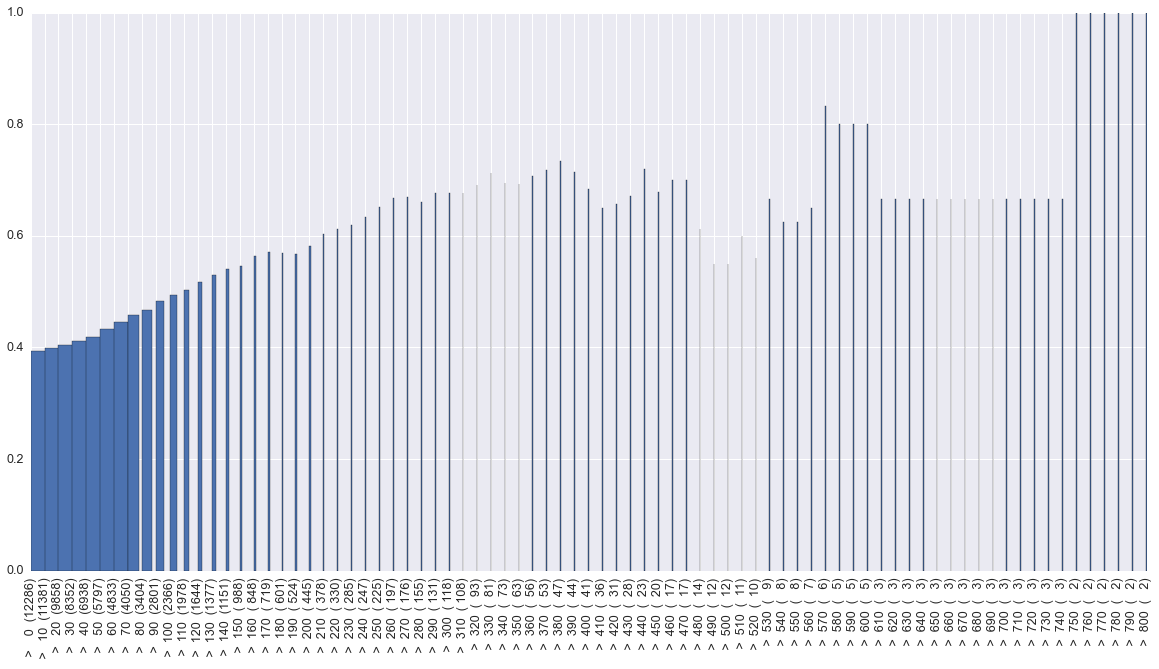

In [28]:
# and now plot the f1-scores for every line-length - sample
plt.figure(figsize=(20,10))
plt.xticks(range(len(xticks)), xticks, rotation=90)
plt.bar(range(len(f1Scores)), f1Scores, width=widths)

print "the width of a bar shows, how big the actuall samplesize was for this wordlength-range"

#zip(xticks, f1Scores, widths) # print the bar-plot values

In [29]:
# the 7 long lines and it's predictions
# where the predictions are wrong, the speeches are actually not very typical for the characters...
#  for example DATA in "The Schizoid Man", whose speech is predicted to be Picard's, is obsessed by another person.
idx = np.where((testDf["line"].str.len() > 560) )
print idx
# a DataFrame with only lines of a certain lenght:
print analyze
print multNB.predict_proba(X_test[idx])

testDf.iloc[idx]



(array([ 312, 1577, 3174, 4009, 5491, 7992, 8578], dtype=int64),)
['PICARD' 'RIKER' 'DATA' 'LAFORGE' 'TROI' 'WORF' 'CRUSHER' 'WESLEY']
[[  8.90452176e-01   4.74060391e-03   2.69514290e-02   1.14912719e-02
    1.42005203e-02   1.31889549e-02   3.88043472e-02   1.70696342e-04]
 [  7.50495055e-01   1.74279591e-03   1.97308252e-01   1.26867679e-05
    4.51056941e-02   7.25386702e-04   4.55285996e-03   5.72691093e-05]
 [  9.78423633e-01   9.26837818e-04   8.86572013e-04   2.69006673e-06
    8.93079511e-03   2.04304495e-04   1.04804489e-02   1.44718335e-04]
 [  8.13362436e-01   1.03104593e-01   4.67480744e-04   5.94941911e-04
    7.73590324e-02   3.26601533e-04   4.62181793e-04   4.32273315e-03]
 [  9.95269639e-01   6.14177941e-04   3.47612794e-03   2.48170503e-06
    4.24662576e-06   1.54608368e-04   4.72230169e-04   6.48793943e-06]
 [  7.03928920e-02   3.74896298e-02   5.78235325e-04   1.01612108e-03
    8.80586251e-01   1.32920823e-03   4.19125175e-03   4.41641072e-03]
 [  6.59089053e-01 

,epsIdx,line,epsName,epsLineIdx,OC,on monitor,telepath,characterIdx
character,,,,,,,,
PICARD,6,"Oh, they're already underway. I have an annou...",Lonely Among Us,288,False,False,False,0
PICARD,34,"You see, he's met two of your three criteria ...",The Measure Of A Man,306,False,False,False,0
PICARD,77,There was a crime committed on board this shi...,Suddenly Human,338,False,False,False,0
PICARD,101,"My turn? No, I'm not much of a story teller. ...",Darmok,266,False,False,False,0
PICARD,163,I was looking through the records of about fi...,The Pegasus,112,False,False,False,0
RIKER,154,My mother died when I was a baby. All I have ...,Interface,264,False,False,False,1
DATA,31,"I believe I have a few words to say, sir. (st...",The Schizoid Man,154,False,False,False,2


In [30]:
testDf["line"].str.len().describe()

count   12,286.0000
mean        65.2545
std         61.7542
min          3.0000
25%         25.0000
50%         47.0000
75%         86.0000
max      1,108.0000
Name: line, dtype: float64

## Observation

The longer the text, the better the prediction. 

The f1-score reaches 0.5 with a text-length higher than around 110. 

But from on a line-length of 110, there are almost only 16% (1978 lines) left of the 12286 lines in the test-set:

In [31]:
testDfLong = testDf[(testDf["line"].str.len() > 110) ]

X_testLong = vectorizer.transform(testDfLong["line"])
predLong = multNB.predict(X_testLong)

print classification_report(testDfLong["characterIdx"].tolist(), 
                            predLong,
                            target_names=analyze)
1978/12286.0

             precision    recall  f1-score   support

     PICARD       0.52      0.71      0.60       612
      RIKER       0.24      0.27      0.25       204
       DATA       0.61      0.66      0.64       422
    LAFORGE       0.67      0.46      0.55       277
       TROI       0.34      0.26      0.30       129
       WORF       0.47      0.24      0.32        98
    CRUSHER       0.57      0.35      0.43       191
     WESLEY       0.20      0.02      0.04        45

avg / total       0.52      0.52      0.50      1978



0.16099625590102556

Also the train-set does a lot better with lines above a length of 120. 

In [32]:
testDfLong = trainDf[(trainDf["line"].str.len() > 110) ]

X_testLong = vectorizer.transform(testDfLong["line"])
predLong = multNB.predict(X_testLong)

print " just train lines with len > 110:"
print classification_report(testDfLong["characterIdx"].tolist(), 
                            predLong,
                            target_names=analyze)

print
print " all train lines:"
print classification_report(trainDf["characterIdx"].tolist(), 
                            predTrain,
                            target_names=analyze)

 just train lines with len > 110:
             precision    recall  f1-score   support

     PICARD       0.86      0.94      0.90      1419
      RIKER       0.87      0.81      0.84       520
       DATA       0.90      0.91      0.91      1011
    LAFORGE       0.93      0.88      0.91       612
       TROI       0.89      0.88      0.89       354
       WORF       0.91      0.82      0.86       213
    CRUSHER       0.95      0.87      0.91       464
     WESLEY       1.00      0.84      0.91        99

avg / total       0.90      0.89      0.89      4692


 all train lines:
             precision    recall  f1-score   support

     PICARD       0.59      0.88      0.71      8772
      RIKER       0.69      0.56      0.62      5206
       DATA       0.72      0.72      0.72      4506
    LAFORGE       0.77      0.61      0.68      3227
       TROI       0.72      0.54      0.62      2286
       WORF       0.70      0.55      0.62      2726
    CRUSHER       0.83      0.55      0.66

# The End For Now
That's it for now. I already try to improve the results by including other features. I'm planning to do another notebook on this. See u then.



# Appendix A - Some Insights in TfidfVectorizer

More information to[Tfidf in Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) 

The following script and comments helped me to find out, how the tfidf values get calculated:

In [33]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfparameters = {
    'min_df': 1,
    'encoding': 'utf-8',
    'decode_error': 'ignore',
    #'norm' : "l1", # normalized to 1
    #'norm' : "l2", # euclidean distance - the words-vector of lenth SQRT(x[0]^2+x[1]^2+..) is normalized to a lenght of 1
    'norm' : None, # not normalized
    #'use_idf' : False,  # default=True, if False the words are counted only
    #'ngram_range': [1,2]
}
uqIndex = ["FIRST","SECOND","THIRD","FORTH"]
# document: in 5/6 documents -> idf = 1.15 =  np.log(6+1/5+1) + 1 
# first: in 2/6 documents    -> idf = 1.84 =  np.log(6+1/2+1) + 1
# fourth: in 1/6 documents   -> idf = ...
# second: in 2/6 documents   -> idf = 1.84 =  np.log(6+1/2+1) + 1
# third: in 1/6 documents    
trainwords = [
    'first document. ',        #0 target in traintarget
    'second second document.', #1
    'third',                   #2   
    'second document.',        #1
    'first document.',         #0
    'fourth document',         #3
 ]
traintarget = [0,1,2,1,0,3] # for predictions (not done here)

testwords = ["first",                               #0
             "second",                              #1  
             "second second!",                      #1  
             "first second!",                       #0  norm=None: "first"=1,84,   "second"=1,84 ; 
                                                    #   norm=l1:   "first"=1,84/(1,84+1,84),           "second"=1,84/(1,84+1,84)
                                                    #   norm=l2:   "first"=1,84/SQRT(1,84^2+1,84^2),   "second"=1,84/SQRT(1,84^2+1,84^2)
             "first second second!",                #1  norm=None: "first"=1,84, 2*"second"=3.69 (=2*1,84) ; 
                                                    #   norm=l1:   "first"=1,84/(1,84+3.69),         2*"second"=3.69/(1,84+3.69)
                                                    #   norm=l2:   "first"=1,84/SQRT(1,84^2+3.69^2), 2*"second"=3.69/SQRT(1,84^2+3.69^2)
             "second second document!",             #1   
             "document first fourth second third",  #3  "third" and fourth" are very seldom in the train-set 
                                                    #      - therefor they have a high impact
             "second second second second second!"  #1 
            ]
testtarget = [0,1,1,0,1,1,3]
vectorizer = TfidfVectorizer(**tfidfparameters)
X_train = vectorizer.fit_transform(trainwords)
X_test  = vectorizer.transform(testwords)

print sorted(vectorizer.vocabulary_)
print vectorizer.idf_
X_test.toarray()


[u'document', u'first', u'fourth', u'second', u'third']
[ 1.15415068  1.84729786  2.25276297  1.84729786  2.25276297]


array([[ 0.        ,  1.84729786,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.84729786,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  3.69459572,  0.        ],
       [ 0.        ,  1.84729786,  0.        ,  1.84729786,  0.        ],
       [ 0.        ,  1.84729786,  0.        ,  3.69459572,  0.        ],
       [ 1.15415068,  0.        ,  0.        ,  3.69459572,  0.        ],
       [ 1.15415068,  1.84729786,  2.25276297,  1.84729786,  2.25276297],
       [ 0.        ,  0.        ,  0.        ,  9.2364893 ,  0.        ]])

In [35]:
np.set_printoptions(suppress=True, precision=3)

mNB = MultinomialNB(alpha=0.01).fit(X_train, traintarget)
mNB.predict_proba(X_test) # predicted class probabilities of testwords

array([[ 1.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.   ],
       [ 0.559,  0.441,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.   ],
       [ 0.005,  0.001,  0.155,  0.839],
       [ 0.   ,  1.   ,  0.   ,  0.   ]])

# Appendix B - Accuracy, Precision, Recall and F1-Score
 


## Why not accuracy?

Have a look at a simple example:

In [36]:
realValue = [0,0,1,1]
predicted = [0,1,1,1] # one 0 has been predicted as a 1

In common sense we would just calculate the accuracy (in German: Treffsicherheit) like:

``` 
  sum of true / sum of all = 3 /4 = 0.75
```

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(  realValue
               , predicted)

0.75

But the accuracy would be very missleading in the following example.

Imagine, 2 of 50 persons have a disease, but our test tells us every one is healthy: 

96% accurancy - Must be a great test! Congratulations! 

In [38]:
realValue2 = [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1] 
predicted2 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

accuracy_score(  realValue2
               , predicted2)


0.95999999999999996

## Precision and Recall:

In this case, it makes more sense, to look at ZERO in more detail with the ratio of 
* *true predicted* ZERO values over all *real* ZERO values (=recall) and 
* *true predicted* ZERO values over all *predicted* ZERO values (=precision)

(more: https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers )

This is both 0.00 for ZERO in the second example:

In [39]:
print classification_report( realValue2
                            ,predicted2
                            ,target_names=["ZERO","ONE"])

             precision    recall  f1-score   support

       ZERO       0.00      0.00      0.00         2
        ONE       0.96      1.00      0.98        48

avg / total       0.92      0.96      0.94        50



But let's have a look at the first example:

In [40]:
realValue = [0,0,1,1]
predicted = [0,1,1,1] # one 0 has been predicted as a 1
print classification_report( realValue 
                            ,predicted
                            ,target_names=["ZERO","ONE"])

             precision    recall  f1-score   support

       ZERO       1.00      0.50      0.67         2
        ONE       0.67      1.00      0.80         2

avg / total       0.83      0.75      0.73         4



### ZERO's
In this case **"ZERO"** has been assigned with **100% precision** - all the predicted "ZERO" are indeed 0's.

But only 1/2 of the real 0's have been assigned to "ZERO", what makes the **recall 50%**

### ONE's
Its the other way around with the **"ONE's"**: Only 2/3 of the predicted "ONE"'s are right: **precision = 66,6%**

But all the real 1's have been assigned with "ONE", what makes the **recall=100%**.

### Helpful Mnemonic

This helps me to remember the difference of precision and recall:

* preci**S**ion : how many **S**elected are relevant = one ZERO found and all found ZERO's relevant = 100%
* **R**ecall : how many **R**elevant are selected =  two ZERO's relevant, but only one ZERO found = 50%


## f1-score 
The f1-score is a usefull mixture of the two: ``2 * precision * recall / precision + recall``:
* ZERO: ``2 * 1.00 * 0.50 / 1.00 + 0.50 = 1.00 / 1.50  = 0.6666`` 
* ONE: ``2 * 0.67 * 1.00 / 0.67 + 1.00 = 1.33 / 1.67  = 0.8000`` 

You may ask, why we don't just take the average of precision and recall? Imagine this:

In [41]:
print classification_report([0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
                            [1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                            target_names=["ZERO","ONE"])
print "average of ZERO's precision + recall:", (0.33 + 0.50) / 2  
print
print
# predicts ZERO all the time! never wrong with the ZERO's!
print classification_report([0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
                            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                            target_names=["ZERO","ONE"])
print "average of ZERO's precision + recall:", (0.04 + 1.00) / 2

             precision    recall  f1-score   support

       ZERO       0.33      0.50      0.40         2
        ONE       0.98      0.96      0.97        45

avg / total       0.95      0.94      0.94        47

average of ZERO's precision + recall: 0.415


             precision    recall  f1-score   support

       ZERO       0.04      1.00      0.08         2
        ONE       0.00      0.00      0.00        45

avg / total       0.00      0.04      0.00        47

average of ZERO's precision + recall: 0.52


In the second simple example the average of precision and recall is a lot better, if the prediction is "ZERO" almost all the time!

But a prediction like this is not really helpful. For example, if you want to distinguish a cancer-patient (0) from a healthy one (1), it does not help, if your prediction tells you, that everyone has cancer.


# Appendix C - Usefull Scrips

Ok, one script at least:

In [42]:
# sorting the X_Train feature names by its weight
m = X_train.sum(axis=0)
#weight = 
lst = m.argsort().A[0][::-1] # matrix sorted, a Array, first row, sort backwards 
sortedWords = np.array(vectorizer.get_feature_names())[lst].tolist() # sir seems to be the most used word...

m.sort() # inplace sort
sortedWeights = m.A[0][::-1]
zip(sortedWords, sortedWeights)

[(u'document', 5.7707533991362912),
 (u'second', 5.5418935811616112),
 (u'first', 3.6945957207744073),
 (u'third', 2.2527629684953681),
 (u'fourth', 2.2527629684953681)]